## Distributions 
week8

Creating a distribution To create a distribution object we specify the distribution and its parameters.

In [23]:
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt


Sampling from a distribution If we want to sample from the distribution, we can simply enter

In [24]:
tfd = tfp.distributions
dist_norm = tfd.Normal(loc=0,scale=1)
dist_norm.sample(4)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.1369156 , -0.60244334,  1.0447625 , -0.49194846], dtype=float32)>

Probability calculations We can also calculate the probability density at an observed value

In [25]:
observation = 2.3
print(dist_norm.prob(observation))

tf.Tensor(0.028327037, shape=(), dtype=float32)


In [26]:
#the log probability density,
print(dist_norm.log_prob(observation))

tf.Tensor(-3.5639386, shape=(), dtype=float32)


In [27]:
#or the cumulative probability density,
print(dist_norm.cdf(observation))

tf.Tensor(0.9892759, shape=(), dtype=float32)


### Example1  - (Sampling from a normal distribution)

In [28]:
#Here we’ll create a normal distribution object with a mean of 10 and a standard deviation of 10.
mean = 10
std = 10
dist_norm = tfd.Normal(loc=mean,scale=std)


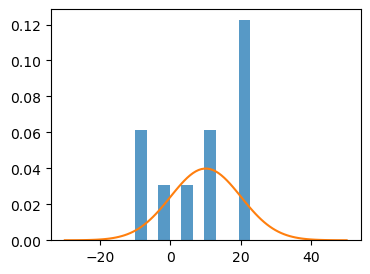

In [29]:
#We’ll sample from the distribution and compare to the known probability density of a normal density function.

# locations at which to plot
x = np.linspace(-30,50,100)
# the analytical value of the normal distribution
y = ((2*np.pi*std**2)**-0.5)*np.exp(-(x-mean)**2/(2*std**2))
# take 10 samples
samples = dist_norm.sample(10)

# plot both a histogram of the samples and the density function
plt.figure(figsize=(4,3))
plt.hist(samples.numpy(),density=True, alpha=0.75)
plt.plot(x,y)
plt.show()

This doesn’t look like a great match, but if we increase the number of samples we can see it converges to
the correct distribution

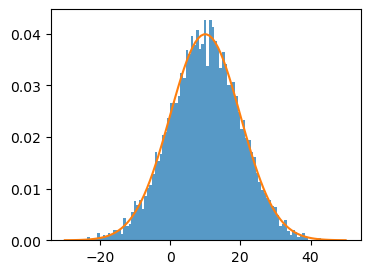

In [30]:
samples = dist_norm.sample(10000)
plt.figure(figsize=(4,3))
plt.hist(samples.numpy(),bins=100,density=True, alpha=0.75)
plt.plot(x,y)
plt.show()

### Example 2 - Sampling from a normal distribution

Suppose we toss a coin 10 times and it comes up heads twice. We’d like to know if this is biased coin.
We denote the probability to obtain a head as p where p=0.5 means the coin is fair.
We can use the binomial distribution to calculate the likelihood of the model parameter p given the observed data

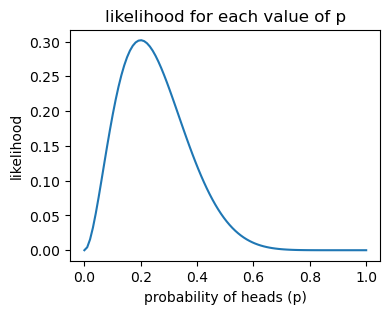

In [31]:
# create locations for plotting
p = np.linspace(0,1,100)

# we specify the number of trials (10) and the number of heads (2)
N = 10
n_heads = 2

# calculate the likelihood for each value of the parameter p
likelihood = tfd.Binomial(total_count=N,probs=p).prob(n_heads)

# plot the results
plt.figure(figsize=(4,3))
plt.plot(p,likelihood)
plt.ylabel('likelihood')
plt.xlabel('probability of heads (p)')
plt.title('likelihood for each value of p')
plt.show()

As the binomial distribution has a conjugate prior, we can also calculate a Bayesian posterior distribution
over our parameter p given our observed data. This involves using another distribution, the Beta distribution

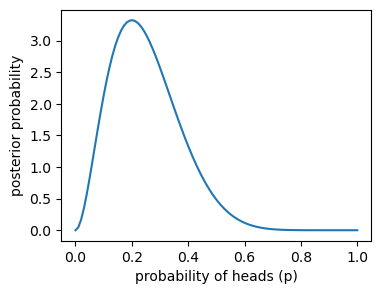

In [33]:
posterior = tfd.Beta(concentration1=1+n_heads, concentration0=1+N-n_heads)

plt.figure(figsize=(4,3))
plt.plot(p,posterior.prob(p))
plt.ylabel('posterior probability')
plt.xlabel('probability of heads (p)')
plt.show()

### Task 1
Given you observe 45 heads after 100 coin flips plot the posterior distribution over p, where p is the
probability of showing heads in a single coin flip

In [19]:
N = 100
n_heads = 45
p = np.linspace(0,1,100)

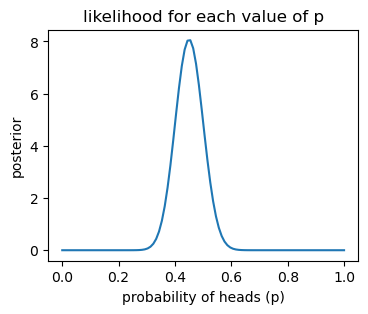

In [20]:
posterior = tfd.Beta(concentration1=1+n_heads, concentration0=1+N-n_heads)

# plot the results
plt.figure(figsize=(4,3))
plt.plot(p,posterior.prob(p))
plt.ylabel('posterior')
plt.xlabel('probability of heads (p)')

plt.show()